In [1]:
import re
import os
from lumaai import LumaAI
import time
import requests

from PIL import Image
import io
import IPython.display as display

def check_status(generation_id):
    
    completed = False
    
    while not completed:
        
      generation = client.generations.get(id=generation_id)
        
      if generation.state == "completed":
        completed = True
          
      elif generation.state == "failed":
        raise RuntimeError(f"Generation failed: {generation.failure_reason}")
          
      print("Dreaming")
        
      time.sleep(2)

def extract_file_id(url):
    match = re.search(r'd/([a-zA-Z0-9_-]+)', url)
    if match:
        return match.group(1)
    else:
        return None

def generate_img_url(file_id):
    
    img_url = f"https://drive.google.com/uc?export=view&id={file_id}"

    return img_url

def generate_text2img(prompt):

    client = LumaAI(
        auth_token=LUMAAI_API_KEY
    )

    generation = client.generations.image.create(
      prompt=prompt,
      aspect_ratio="1:1",
      model="photon-1"
    )
    
    completed = False
    
    while not completed:
      generation = client.generations.get(id=generation.id)
      if generation.state == "completed":
        completed = True
      elif generation.state == "failed":
        raise RuntimeError(f"Generation failed: {generation.failure_reason}")
          
      print("Dreaming")
      time.sleep(2)

    # get img_url
    image_url = generation.assets.image
    
    return image_url

def save_img(image_url, image_path):
    
    base64_img = requests.get(image_url).content
    
    with open(f'{image_path}.png', 'wb') as file:
        file.write(base64_img)
        
    return base64_img

def display_img(base64_img):
    im = Image.open(io.BytesIO(base64_img))
    im_resized = im.resize((300, int(im.height * 300 / im.width)))
    display.display(im_resized)

def generate_ref_img(prompt, ref_dic):

    client = LumaAI(
        auth_token=LUMAAI_API_KEY
    )
    
    generation = client.generations.image.create(
        prompt=prompt,
        aspect_ratio="1:1",
        image_ref=ref_dic
    )

    completed = False
    
    while not completed:
      generation = client.generations.get(id=generation.id)
      if generation.state == "completed":
        completed = True
      elif generation.state == "failed":
        raise RuntimeError(f"Generation failed: {generation.failure_reason}")
          
      print("Dreaming")
      time.sleep(2)

    # get img_url
    image_url = generation.assets.image
    
    return image_url

def generate_style_img(prompt, ref_dic):

    client = LumaAI(
        auth_token=LUMAAI_API_KEY
    )
    
    generation = client.generations.image.create(
        prompt=prompt,
        style_ref=ref_dic
    )

    completed = False
    
    while not completed:
      generation = client.generations.get(id=generation.id)
      if generation.state == "completed":
        completed = True
      elif generation.state == "failed":
        raise RuntimeError(f"Generation failed: {generation.failure_reason}")
          
      print("Dreaming")
      time.sleep(2)

    # get img_url
    image_url = generation.assets.image
    
    return image_url


In [2]:
# luma

LUMAAI_API_KEY = ""

client = LumaAI(
    auth_token=LUMAAI_API_KEY
)

Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming


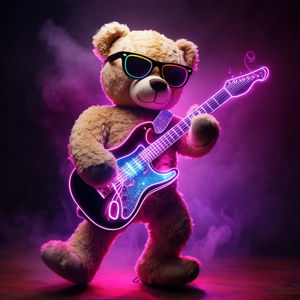

In [4]:
prompt = "A teddy bear in sunglasses playing electric guitar and dancing"
image_url = generate_text2img(prompt)
im = save_img(image_url, "text2img")
display_img(im)

https://drive.google.com/uc?export=view&id=1hZsxnWWPMrKEsaOwXnDDyQJbm-qs1zj9
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming


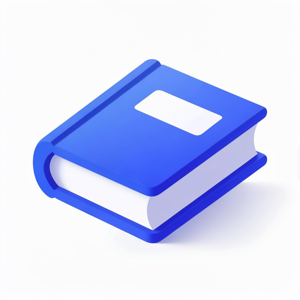

In [5]:
# 2d to 3d style
book_drive_url = "https://drive.google.com/file/d/1hZsxnWWPMrKEsaOwXnDDyQJbm-qs1zj9/view?usp=drive_link"
book_url = generate_img_url(extract_file_id(book_drive_url))

print(book_url)

prompt = "transform 2D to 3D style, app icon, transparent background"

ref_dict = [
      {
        "url": book_url,
        "weight": 1.0
      }
    ]

image_url = generate_ref_img(prompt, ref_dict)

im = save_img(image_url, "2dto3d_book")
display_img(im)

https://drive.google.com/uc?export=view&id=17xs6cDuJXZYKrXu1tLTspHkaPpD6Gg6x
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming


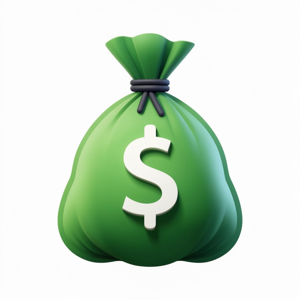

In [6]:
bag_drive_url = "https://drive.google.com/file/d/17xs6cDuJXZYKrXu1tLTspHkaPpD6Gg6x/view?usp=drive_link"
bag_url = generate_img_url(extract_file_id(bag_drive_url))

print(bag_url)

prompt = "transform 2D to 3D style, app icon, transparent background"

ref_dict = [
      {
        "url": bag_url,
        "weight": 1.0
      }
    ]

image_url = generate_ref_img(prompt, ref_dict)

im = save_img(image_url, "2dto3d_bag")
display_img(im)

Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming


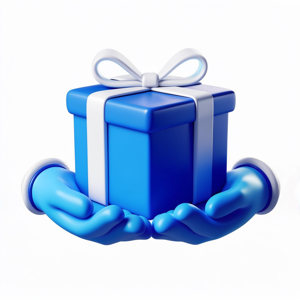

In [16]:
prompt = "Position the gift in the center of both hands and show it being given"

# gift
gift_dirve_url = "https://drive.google.com/file/d/1bW3k2cWDYYjRych-cqzzAQy0szYBQpzU/view?usp=drive_link" 
gift_url = generate_img_url(extract_file_id(gift_dirve_url))

# hand
hand_drive_url = "https://drive.google.com/file/d/1eV2utDZEprN9u7zEeDpzPzqkE-Vb5FV0/view?usp=drive_link"
hand_url = generate_img_url(extract_file_id(hand_drive_url))

ref_dic = [
          {
            "url": gift_url,
            "weight": 0.6
          },
          {
            "url": hand_url,
            "weight": 1.0
              
          }
]

image_url = generate_ref_img(prompt, ref_dic)

im = save_img(image_url, "ref2img")
display_img(im)

Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming


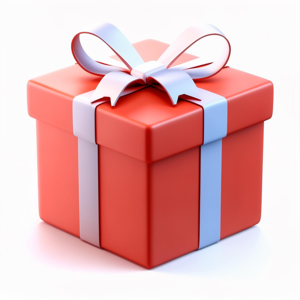

In [9]:
prompt = "Change the color of the gift box to match the color tones and style of the second reference image."

# gift
gift_dirve_url = "https://drive.google.com/file/d/1bW3k2cWDYYjRych-cqzzAQy0szYBQpzU/view?usp=drive_link" 
gift_url = generate_img_url(extract_file_id(gift_dirve_url))

# hand
red_color_drive_url = "https://drive.google.com/file/d/1gHCDn3evwKeencJWCiAQd1lhyYLN7fQ5/view?usp=drive_link"
red_color_url = generate_img_url(extract_file_id(red_color_drive_url))

# weights: content vs style
ref_dic = [
    {
        "url": gift_url,
        "weight": 1.0  # content priority
    },
    {
        "url": red_color_url,
        "weight": 0.6  # style/color influence
    }
]

image_url = generate_ref_img(prompt, ref_dic)

im = save_img(image_url, "ref2img_color")
display_img(im)